## Working with alerts received from fink-broker

Here we will illustrate how to work with fink alerts

In [1]:
import io
import gzip
import matplotlib.pyplot as plt
from astropy.io import fits
import aplpy
from pprint import pprint
from fink_client.consumer import AlertConsumer

In [2]:
# create an instance of AlertConsumer
mytopics = ["rrlyr", "ebwuma"]
myconfigs = {
    "username": "test_user",
    "password": "********",
    "group_id": "test_group"
}

consumer = AlertConsumer(mytopics, myconfigs)

In [5]:
# get an alert
topic, alert = consumer.poll(2)

Let's have a look at the schema of an alert

In [7]:
pprint(consumer._parsed_schema)

{'__fastavro_parsed': True,
 'fields': [{'name': 'objectId', 'type': ['string', 'null']},
            {'name': 'schemavsn', 'type': ['string', 'null']},
            {'name': 'publisher', 'type': ['string', 'null']},
            {'name': 'candid', 'type': ['long', 'null']},
            {'name': 'timestamp', 'type': ['string', 'null']},
            {'name': 'cross_match_alerts_per_batch',
             'type': ['string', 'null']},
            {'name': 'candidate',
             'type': {'fields': [{'name': 'jd', 'type': ['double', 'null']},
                                 {'name': 'fid', 'type': ['int', 'null']},
                                 {'name': 'pid', 'type': ['long', 'null']},
                                 {'name': 'diffmaglim',
                                  'type': ['float', 'null']},
                                 {'name': 'pdiffimfilename',
                                  'type': ['string', 'null']},
                                 {'name': 'programpi',
         

Alerts are a dictionary of data in the structure as shown in above schema.
Let's plot the cutout stamps

We can plot the cut out stamps in an alert similar to as shown at:
https://github.com/ZwickyTransientFacility/ztf-avro-alert

In [8]:
def plot_cutout(stamp, fig=None, subplot=None, **kwargs):
    with gzip.open(io.BytesIO(stamp), 'rb') as f:
        with fits.open(io.BytesIO(f.read())) as hdul:
            if fig is None:
                fig = plt.figure(figsize=(4,4))
            if subplot is None:
                subplot = (1,1,1)
            ffig = aplpy.FITSFigure(hdul[0],figure=fig, subplot=subplot, **kwargs)
            ffig.show_grayscale(stretch='arcsinh')
    return ffig

def show_stamps(alert):
    #fig, axes = plt.subplots(1,3, figsize=(12,4))
    fig = plt.figure(figsize=(12,4))
    for i, cutout in enumerate(['Science','Template','Difference']):
        stamp = alert['cutout{}'.format(cutout)]['stampData']
        ffig = plot_cutout(stamp, fig=fig, subplot = (1,3,i+1))
        ffig.set_title(cutout)

INFO: Auto-setting vmin to  7.427e+01 [aplpy.core]
INFO: Auto-setting vmax to  2.793e+02 [aplpy.core]
INFO: Auto-setting vmin to  8.524e+01 [aplpy.core]
INFO: Auto-setting vmax to  2.478e+02 [aplpy.core]


INFO: Auto-setting vmin to -1.390e+01 [aplpy.core]
INFO: Auto-setting vmax to  3.427e+01 [aplpy.core]


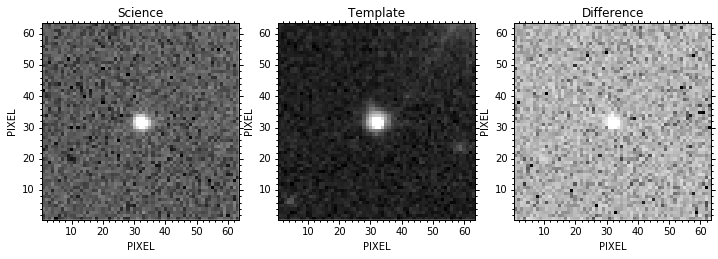

In [9]:
show_stamps(alert)